In [4]:
#attempt at importing data

url='https://www.dropbox.com/s/k692avun0144n90/lab0_spectral_data.txt?dl=0'
from urllib.request import urlopen
from urllib.request import urlretrieve
urlretrieve(url, "data.txt")
#dropbox=urlopen('https://www.dropbox.com/s/k692avun0144n90/lab0_spectral_data.txt?dl=0')
#print(dropbox.read())

('data.txt', <http.client.HTTPMessage at 0x11585d198>)

In [1]:
#attempt 2 at importing data

curl -L -o lab_0_spectral_data.txt 'ç'
from urllib.request import urlopen
from urllib.request import urlretrieve
u=urlopen(url)
data=u.read()
u.close()

with open('data.txt', "wb") as f:
    f.write(data)

SyntaxError: invalid syntax (<ipython-input-1-ef491d733a41>, line 3)

In [5]:
curl -L -o lab0_spectral_data.txt https://www.dropbox.com/s/k692avun0144n90/lab0_spectral_data.txt?dl=0

SyntaxError: invalid syntax (<ipython-input-5-25600447a68e>, line 1)

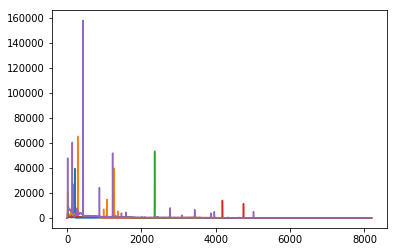

In [50]:
# DATA PARSER (using already downloaded data :\

import matplotlib.pyplot as plt
import numpy as np

f=open( 'lab0_spectral_data.txt', "r")
lines=f.readlines()[1:]


Am241=[] # 59.54 keV
Ba133=[] # 80.997 keV (34%) 302.853 keV (18%) 356.017 keV (62%)
Cs137=[] # 661.66 keV
Co60=[] # 1173.2 keV and 1332.51 keV
Eu152=[] # 344.28 keV (27%) 1112.1 keV (14%) 1408.1 keV (21%) 121.78 keV (26%)
allsources=[]


for x in lines:
    x.split('\t')
    y=[int(s) for s in x.split() if s.isdigit()]
    Am241.append(y[0])
    Ba133.append(y[1])
    Cs137.append(y[2])
    Co60.append(y[3])
    Eu152.append(y[4])
# testing that input vectors have the same length
f.close()


len(Cs137)==len(Am241)==len(Cs137)==len(Co60)==len(Eu152)==8192
chan=list(range(1,len(Cs137)+1)) #number of channels:8192

for i in chan:
     allsources.append(Am241[i-1]+Ba133[i-1]+Co60[i-1]+Eu152[i-1]+Cs137[i-1])


plt.plot(chan, Am241,chan, Ba133,chan, Cs137, chan,Co60, chan, Eu152)
plt.show()
#plt.figure()
#plt.semilogy(chan,allsources)
#plt.show()




In [51]:
## Curvefitting for NE 2024

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

init_vals=[# # #] #for [amp, centroid, width]
    
best_vals, covar = curve_fit(gaussian, x, y, p0=init_vals)
print best_vals

In [52]:
## Example from Online

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def func(x, a, u, s):
    return a/ np.sqrt(2(np.pi))* np.exp(-(x-u)**2/(2*s**2))



xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)
np.random.seed(1729)
y_noise = 0.2 * np.random.normal(size=xdata.size)
ydata = y + y_noise
plt.plot(xdata, ydata, 'b-', label='data')

popt, pcov = curve_fit(func, xdata, ydata)
popt

plt.plot(xdata, func(xdata, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

plt.show()

#Constrain the optimization to the region of 0 <= a <= 3, 0 <= b <= 1 and 0 <= c <= 0.5:

popt, pcov = curve_fit(func, xdata, ydata, bounds=(0, [3., 1., 0.5]))
popt

plt.plot(xdata, func(xdata, *popt), 'g--',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

TypeError: 'int' object is not callable

In [53]:
np.pi

3.141592653589793